Lab2 Rong Xu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("GSS.2006.csv")
df.head(5)

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tvhours.describe()

count    1987.000000
mean        2.935581
std         2.285925
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        24.000000
Name: tvhours, dtype: float64

# 1. Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s) 

In [7]:
conditions = [
    (df['tvhours'] < 2),
    (df['tvhours'] > 1) & (df['tvhours'] < 4),
    (df['tvhours'] > 3)]
choices = [1, 2, 3]
df['tv'] = np.select(conditions, choices, default=np.nan)
df.tv.describe()

count    1987.000000
mean        2.035732
std         0.734169
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: tv, dtype: float64

In [8]:
df.tv.value_counts(normalize=True)

2.0    0.459990
3.0    0.287871
1.0    0.252139
Name: tv, dtype: float64

### answer
for this question, I chose to look at the variable TVHOURS, which asking On the average day, about how many hours do you personally watch television? supposed that less than 2 hours on televasion recognized as low level, between 2 hours to 3 hours recognized as median level, and for those is over 3 hours recognized as high level. It indicated that nearly 46% of responders are spending less time on televasion, and nearly 29% of it are spending more time on televasion. 

1 - low
2 - median
3 - high 

In [9]:
# check if the record variables correct

In [10]:
res = pd.crosstab(df.tvhours, df.tv)
res.astype('float').div(res.sum(axis=0), axis=1)

tv,1.0,2.0,3.0
tvhours,,,
0.0,0.157685,0.000000,0.000000
1.0,0.842315,0.000000,0.000000
2.0,0.000000,0.631291,0.000000
3.0,0.000000,0.368709,0.000000
4.0,0.000000,0.000000,0.395105
5.0,0.000000,0.000000,0.237762
6.0,0.000000,0.000000,0.173077
7.0,0.000000,0.000000,0.040210
8.0,0.000000,0.000000,0.059441


### answer
from this tab, we can concluded that people spending 1 hour and less on televasion are recongized as low, spending between 2 hours and 3 hours are median, spending 4 hours and over on televasion are high. This result proven the step before is right.

In [11]:
# another variables - NEWS

In [12]:
df.news.describe()

count    2728.000000
mean        2.487903
std         1.417529
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: news, dtype: float64

In [13]:
my_tab = pd.crosstab(index=df['news'],
                     columns='count')
def compute_percentage(x):
    pct = float(x/my_tab['count'].sum())*100
    return round(pct, 2)
my_tab['percentage'] = my_tab.apply(compute_percentage, axis=1)
my_tab

col_0,count,percentage
news,,
1.0,945,34.64
2.0,611,22.40
3.0,418,15.32
4.0,404,14.81
5.0,350,12.83


In [14]:
conditions = [
    (df['news'] < 2),
    (df['news'] > 1)]
choices = [1,0]
df['often'] = np.select(conditions, choices, default=np.nan)
df.often.value_counts(normalize=True)

0.0    0.653592
1.0    0.346408
Name: often, dtype: float64

### answer
another variabe i chose is NEWS that it present how often people read the newspaper. 1 - people who read the newspaper every day, and 0 - people who didnt say readspaper every day. This indicated that around 34% person read newspaper everday and around 56% of it are not.

0 - non
1 - always

# 2. Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.

In [15]:
# crosstab for tvhours and news

res = pd.crosstab(df['tv'], df['often'], normalize='columns')
res

often,0.0,1.0
tv,,
1.0,0.259489,0.238506
2.0,0.432998,0.510057
3.0,0.307514,0.251437


### answer
This tab shown that people who read newspaaper everyday could also spending more time on watching televasion, so we couldnt see any associated with people who read newspaper everyone would spend less time on televsion. There is only nearly 26% of person who read newspaper everyday will spend less time on televsion. 
In addition, for people who read newspaper no matter the frequency, over half of them would most likely say they will spend 2 and more hours on televasion, as around 74% people in 0-often and 76% people in 1-often. 

# 3. Run a linear regression with 1 independent and 1 dependent variable; make all of the recodes necessary to make the model as easy to interpret as possible; and explain your results.

In [16]:
lm = smf.ols(formula = 'tvhours~news', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tvhours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     13.94
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           0.000195
Time:                        22:53:45   Log-Likelihood:                -4454.8
No. Observations:                1987   AIC:                             8914.
Df Residuals:                    1985   BIC:                             8925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6023      0.103     25.298      0.000       2.401       2.804
news           0.1332      0.036      3.733      0.000       0.063       0.203
==============================================================================
Omnibus:                     1015.716   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8626.537
Skew:                           2.251   Prob(JB):                         0.00
Kurtosis:                      12.161   Cond. No.                         6.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### answer
after run the linear regression model for variable tvhours and news, the r square is 0.007, whch tells only 0.7% of the variance in the dependent variable tvhours is explained by the independent variables news. Therefore, this model is a not good fit for the data. In this case, both the intercept and the news coefficient have very small p-values, it suggests that the coefficient is statistically significant. In conclusion, this model proven a found that there is a statistically significant relationship between dependent variable tvhours and independent variables news, and the low rate of R square shown only 0.7% of the variation in tvhours can explain the variable news that each additional unit of news, tvhours is expected to increase by approximately 0.1332 hours.

since the R square is low so I want to run the linear regression model for another two variables - paeduc and educ.

In [17]:
lm1 = smf.ols(formula = 'educ~paeduc', data = df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     801.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          4.85e-151
Time:                        22:53:45   Log-Likelihood:                -5453.9
No. Observations:                2255   AIC:                         1.091e+04
Df Residuals:                    2253   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6751      0.153     63.063      0.000       9.374       9.976
paeduc         0.3573      0.013     28.303      0.000       0.333       0.382
==============================================================================
Omnibus:                       95.775   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.591
Skew:                          -0.262   Prob(JB):                     1.87e-46
Kurtosis:                       4.403   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### answer
For this linear regression model, I chose to look at the variable 'educ' and 'paeduc' to study how would the person's father education could be related to the person's education. It indicated that additional one level of the education father acheived, their kids' education will increase by 0.357 unit, which means their kids will also achieved a higher education with their father positively influence.

This model has R-squared of 0.262, which is great, it means 26.2% of the variance in the dependent variable paeduc is explained by the independent variables educ. Therefore, this model is a good fit for the data and there could have other factor affect the variable paeduc that are consider in this model. 

# 4. Plot two variables, either as a scatter plot or boxplot; add in trend/regression lines; and explain your results.

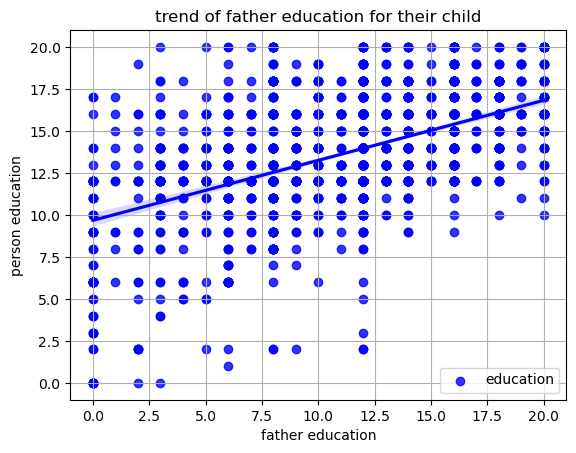

In [18]:
import seaborn as sns
sns.regplot(x= 'paeduc', y= 'educ', data=df, color='blue', label='education')

plt.xlabel('father education')
plt.ylabel('person education')
plt.title('trend of father education for their child')
plt.legend()
plt.grid(True)

plt.show()

### answer
This graph further supposed the conclusion from linear regression mode that the father with higher education that their kid will also received higher education, therefore there is a positive relationship between kids education ad father education. In other words, We could say that the level of person's education is more likely impact by their father's education. 